In [ ]:
## Pie Chart- Top 3 countries that uses zomato
### Find the countries name that has given 0 rating 
##find out which currency is used by which country?
## Create a pie chart for top 5 cities distribution


In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')


In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
#to check null value using for loop
[feature for feature in df.columns if df[feature].isnull().sum()>0]


['Cuisines']

In [16]:
!pip install openpyxl


   ---------------------------------------- 0.0/251.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/251.4 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/251.4 kB 325.1 kB/s eta 0:00:01
   ----------- --------------------------- 71.7/251.4 kB 558.5 kB/s eta 0:00:01
   -------------------------------- ------- 204.8/251.4 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 251.4/251.4 kB 1.3 MB/s eta 0:00:00


In [20]:
#to chekc the outlier in heat map

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

In [21]:
country=pd.read_excel('Country-Code.xlsx')

In [22]:
country.columns

Index(['Country Code', 'Country'], dtype='object')

In [24]:
final_df=pd.merge(df,country,on='Country Code',how='left')
final_df.head(4) #df dataframe has all values so i used left join

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines


In [25]:
## Pie Chart- Top 3 countries that uses zomato
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [28]:
country_values=final_df['Country'].value_counts().values

In [30]:
country_labels=final_df['Country'].value_counts().index

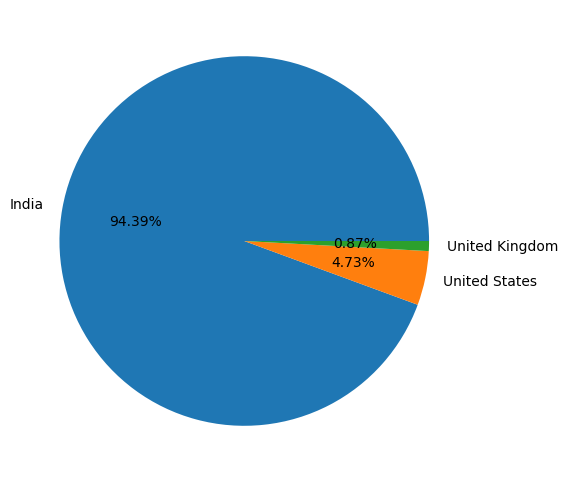

In [37]:
## Pie Chart- Top 3 countries that uses zomato

plt.figure(figsize=(12, 6))
plt.pie(x=country_values[:3],labels=country_labels[:3],autopct='%.2f%%')
plt.show()

In [51]:
rating_df=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating_Count'})

In [53]:
rating_df

,Aggregate rating,Rating color,Rating text,Rating_Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation
- When Rating is between 4.5 to 4.9---> Excellent
- When Rating are between 4.0 to 3.4--->very good
- when Rating is between 3.5 to 3.9----> good
- when Rating is between 3.0 to 3.4----> average
- when Rating is between 2.5 to 2.9----> average
- when Rating is between 2.0 to 2.4----> Poor

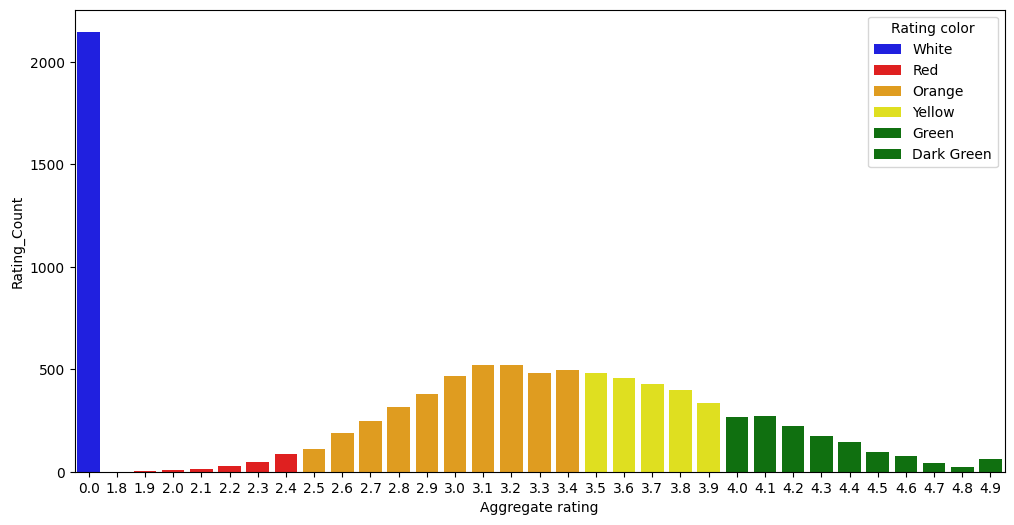

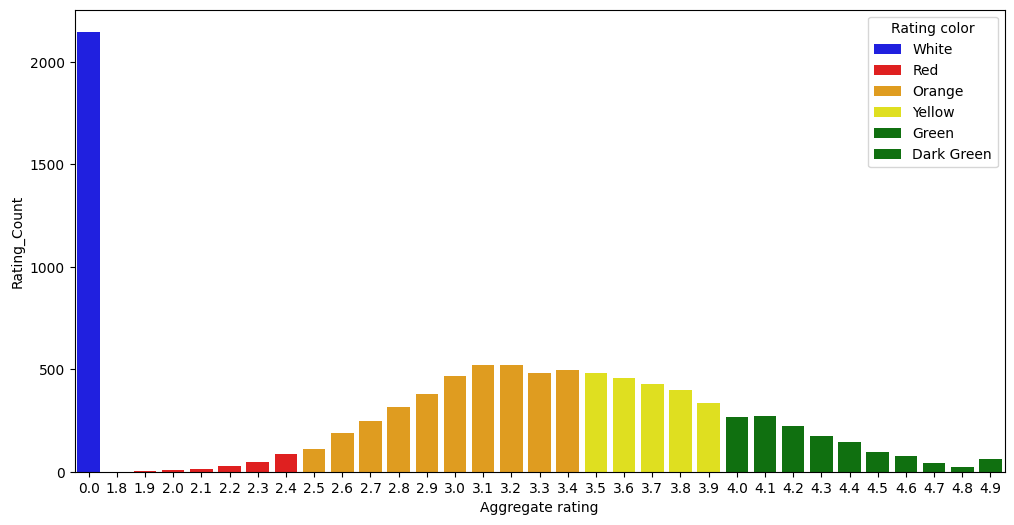

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(x="Aggregate rating",y="Rating_Count",data=rating_df,hue='Rating color',palette=['blue','red','orange','yellow','green','green'])
plt.show()

In [80]:
rating_df

,Aggregate rating,Rating color,Rating text,Rating_Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [75]:
### Find the countries name that has given 0 rating 
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [88]:
final_df[final_df['Rating color']=='White'][['Country','Aggregate rating']].value_counts().reset_index()

,Country,Aggregate rating,count
0,India,0.0,2139
1,Brazil,0.0,5
2,United States,0.0,3
3,United Kingdom,0.0,1


Observations Maximum number of 0 ratings are from Indian customers

In [93]:
##find out which currency is used by which country?
final_df.groupby(['Currency','Country']).size().reset_index().rename(columns={0:'Count'})

,Currency,Country,Count
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [94]:
## Create a pie chart for top 5 cities distribution
city_values=final_df['City'].value_counts().values
city_labels=final_df['City'].value_counts().index

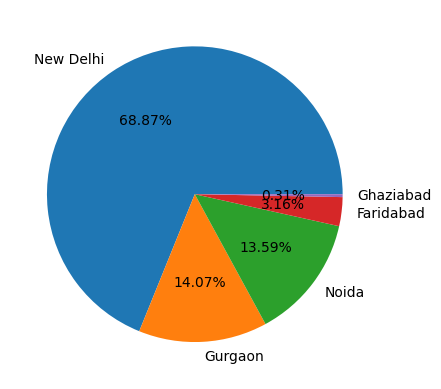

In [98]:
plt.pie(x=city_values[:5],labels=city_labels[:5],autopct='%.2f%%')
plt.show()

In [99]:
## Which Countries do have online deliveries option
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [100]:
final_df['Is delivering now'].value_counts()

Is delivering now
No     9517
Yes      34
Name: count, dtype: int64

In [113]:
del_option=final_df[final_df['Has Online delivery']=='Yes']['Country'].value_counts()

In [117]:
delivery_option=final_df.groupby('Country')['Has Online delivery'].value_counts()

In [118]:
online_delivery_option=delivery_option.loc[:,'Yes']
online_delivery_option

Country
India    2423
UAE        28
Name: count, dtype: int64

In [120]:
#Find the top 10 cuisines 
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [129]:
final_df['Cuisines'].value_counts().head(10).reset_index().rename(columns={0:'Count'})

,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


In [137]:
final_df.groupby(['Restaurant Name','Cuisines'])[['Restaurant Name','Cuisines']].size()

Restaurant Name       Cuisines                                   
 Let's Burrrp         Chinese, North Indian                          1
#45                   Cafe                                           1
#Dilliwaala6          North Indian                                   1
#InstaFreeze          Ice Cream                                      1
#OFF Campus           Cafe, Continental, Italian, Fast Food          1
                                                                    ..
t Lounge by Dilmah    Cafe, Tea, Desserts                            1
tashas                Cafe, Mediterranean                            1
wagamama              Japanese, Asian                                1
{Niche} - Cafe & Bar  North Indian, Chinese, Italian, Continental    1
íukuraÛôa SofrasÛ±   Kebab, Izgara                                  1
Length: 7940, dtype: int64

In [3]:
final_df

NameError: name 'final_df' is not defined